In [ ]:
#Rendy Putrayana - 220711615 - Tensorflow - Klasfiikasi Gambar Kunyit, Jahe, dan Lengkuas - VGG

In [14]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [28]:
count = 0
dirs = os.listdir(r'C:\Users\ASUS\Documents\dataset\dataset train test\train')
for i in dirs:
    files = list(os.listdir(r'C:\Users\ASUS\Documents\dataset\dataset train test\train' + '/' + i))
    count += len(files)
    print(i + ' punya ' + str(len(files)) + ' images')
print('Total gambar dalam folder: ', count)

jahe punya 80 images
kunyit punya 80 images
lengkuas punya 80 images
Total gambar dalam folder:  240


In [16]:
import os
import shutil
from sklearn.model_selection import train_test_split

base_dir = r"C:\Users\ASUS\Documents\dataset\dataset train test\train"
validation_dir = r"C:\Users\ASUS\Documents\dataset\dataset train test\validation"
test_dir = r"C:\Users\ASUS\Documents\dataset\dataset train test\test" 

os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

categories = [name for name in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, name))]

validation_split = 0.1  # 10% untuk validasi
test_split = 0.1        # 10% untuk test
train_split = 1 - validation_split - test_split  # 80% untuk train

for category in categories:
    category_dir = os.path.join(base_dir, category)
    validation_category_dir = os.path.join(validation_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    
    os.makedirs(validation_category_dir, exist_ok=True)
    os.makedirs(test_category_dir, exist_ok=True)
    
    all_files = os.listdir(category_dir)
    
    train_val_files, test_files = train_test_split(all_files, test_size=test_split, random_state=42)
    
    train_files, val_files = train_test_split(train_val_files, test_size=validation_split / (train_split + validation_split), random_state=42)
    
    for file in val_files:
        shutil.move(os.path.join(category_dir, file), os.path.join(validation_category_dir, file))
    
    for file in test_files:
        shutil.move(os.path.join(category_dir, file), os.path.join(test_category_dir, file))

print("Dataset berhasil dibagi menjadi train, validation, dan test!")


Dataset berhasil dibagi menjadi train, validation, dan test!


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    r'dataset train test\train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    r'dataset train test\validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    r'dataset train test\test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 240 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


Found 30 images belonging to 3 classes.


c:\ProgramData\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


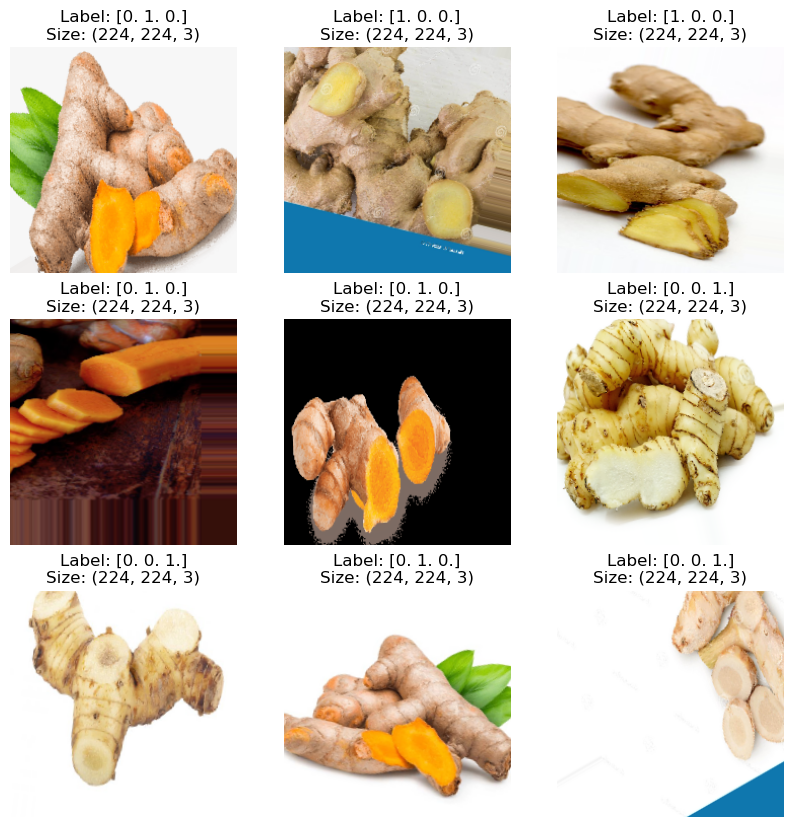

In [18]:
sample_batch = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(min(9, len(sample_batch[0]))):
    image = sample_batch[0][i]
    label = sample_batch[1][i]
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Label: {label}\nSize: {image.shape}")
    plt.axis('off')
plt.show()

In [19]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [22]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.2794 - loss: 1.1428 - val_accuracy: 0.3667 - val_loss: 1.0979
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.3753 - loss: 1.0940 - val_accuracy: 0.3667 - val_loss: 1.0821
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.4518 - loss: 1.0715 - val_accuracy: 0.4333 - val_loss: 1.0479
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.5021 - loss: 1.0233 - val_accuracy: 0.4333 - val_loss: 0.9929
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5511 - loss: 0.9399 - val_accuracy: 0.5000 - val_loss: 0.9147
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5388 - loss: 0.8841 - val_accuracy: 0.6000 - val_loss: 0.8258
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5773 - loss: 0.8721 - val_accuracy: 0.6000 - val_loss: 0.7915
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4828 - loss: 0.9472 - val_accuracy: 0.4667 - val_loss: 0.8554
Epoch 9/

In [23]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step - accuracy: 0.6667 - loss: 0.7331
Test Loss: 0.7331267595291138
Test Accuracy: 0.6666666865348816


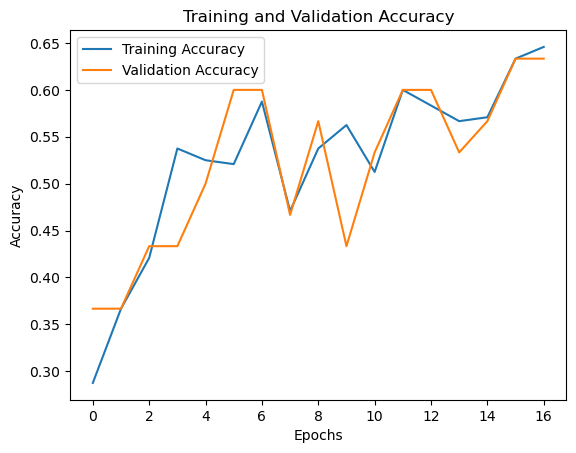

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


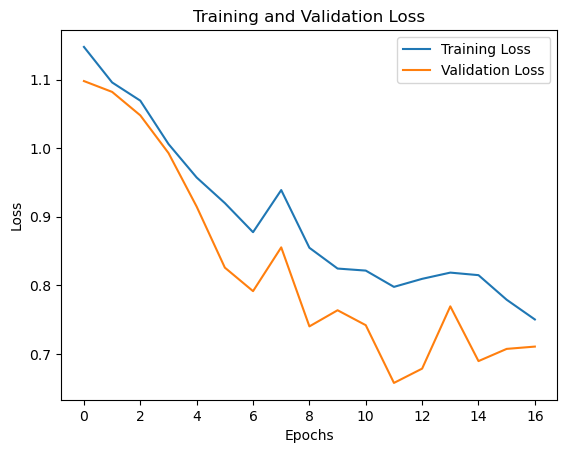

In [25]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
model.save('VGG rev.h5')

Found 30 images belonging to 3 classes.


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6667 - loss: 0.7331
Test Loss: 0.7331267595291138
Test Accuracy: 0.6666666865348816
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 996ms/step


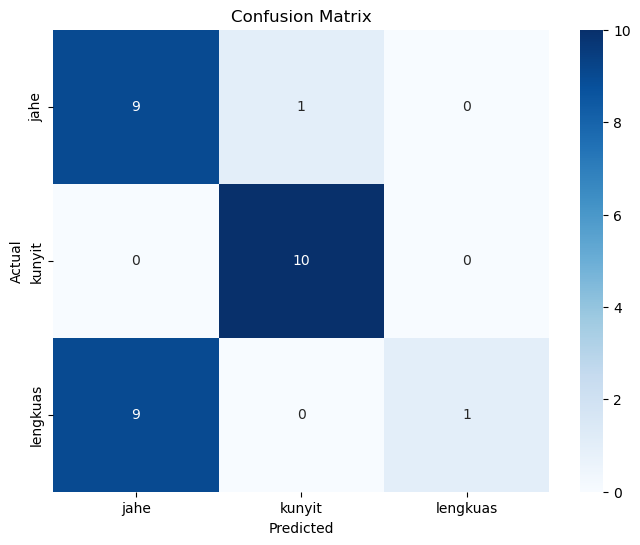

Classification Report:
              precision    recall  f1-score   support

        jahe       0.50      0.90      0.64        10
      kunyit       0.91      1.00      0.95        10
    lengkuas       1.00      0.10      0.18        10

    accuracy                           0.67        30
   macro avg       0.80      0.67      0.59        30
weighted avg       0.80      0.67      0.59        30



In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    'dataset train test/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

model = load_model('VGG rev.h5')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
class_report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print("Classification Report:")
print(class_report)
